### Задание 1

### Импортируйте библиотеки pandas, numpy и matplotlib. Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.Создайте датафреймы X и y из этих данных.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [48]:
from sklearn.datasets import load_boston

In [49]:
boston = load_boston()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [50]:
data = boston.data

In [51]:
data.shape

(506, 13)

In [52]:
target = boston.target

In [53]:
feature_names = boston.feature_names

### Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42. Масштабируйте данные с помощью StandardScaler.

In [54]:
X = pd.DataFrame(data, columns=feature_names)

In [55]:
y = pd.DataFrame(target, columns=['price'])

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [58]:
from sklearn.cluster import KMeans

In [59]:
X_train.shape

(404, 13)

In [60]:
X_test.shape

(102, 13)

In [61]:
y_train.shape

(404, 1)

In [62]:
y_test.shape

(102, 1)

In [63]:
from sklearn.manifold import TSNE

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

In [66]:
X_train_scaled = scaler.fit_transform(X_train)

In [67]:
X_test_scaled = scaler.transform(X_test)

In [68]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [69]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

### Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42. Постройте диаграмму рассеяния на этих данных.

In [70]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [71]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [72]:
X_train_tsne

array([[ 1.81041489e+01,  2.91841412e+01],
       [ 3.36446118e+00, -7.90966845e+00],
       [-2.07167511e+01, -8.94725513e+00],
       [ 2.76545868e+01,  2.66364594e+01],
       [ 4.35941935e+00, -7.43922949e+00],
       [-1.18708668e+01, -3.19696522e+00],
       [-9.88421822e+00, -3.11915612e+00],
       [-2.67814331e+01, -1.50311155e+01],
       [ 2.85059834e+01,  2.74729290e+01],
       [ 2.97867966e+01,  2.44989853e+01],
       [-1.03291616e+01, -2.70374441e+00],
       [-6.06545353e+00, -9.15262985e+00],
       [-5.61790419e+00, -1.35841761e+01],
       [ 2.86210976e+01,  2.46200790e+01],
       [-7.11505461e+00, -1.45416355e+01],
       [ 7.49843025e+00, -8.60527611e+00],
       [ 1.22831607e+00, -5.80473423e+00],
       [-2.18536625e+01, -8.58939934e+00],
       [-1.68641014e+01, -1.03258257e+01],
       [-1.86876888e+01, -6.71250486e+00],
       [ 2.41089859e+01,  2.88961773e+01],
       [-7.64432192e-01, -5.37148428e+00],
       [-1.35651073e+01, -3.63450623e+00],
       [-8.

In [73]:
X_train_tsne.shape

(404, 2)

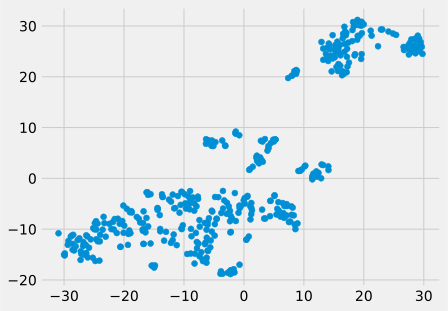

In [74]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

### Задание 2

### С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42. Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

In [75]:
from sklearn.cluster import KMeans

In [87]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [88]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [89]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

In [90]:
labels_test = kmeans.predict(X_test_scaled)

In [91]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

In [92]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers

array([[7.35655814e-02, 4.75872093e+01, 3.98453488e+00, 4.65116279e-02,
        4.25809302e-01, 6.64852326e+00, 3.17534884e+01, 6.85224651e+00,
        4.29069767e+00, 3.06918605e+02, 1.69767442e+01, 3.88698256e+02,
        6.57709302e+00],
       [1.07970284e+01, 1.77635684e-15, 1.87594488e+01, 9.44881890e-02,
        6.91133858e-01, 5.96400787e+00, 9.03409449e+01, 1.98231732e+00,
        2.00157480e+01, 6.21842520e+02, 1.96622047e+01, 2.96165118e+02,
        1.88503150e+01],
       [4.21660209e-01, 3.04450262e+00, 8.96774869e+00, 6.80628272e-02,
        5.25790576e-01, 6.40009424e+00, 7.06424084e+01, 3.65164031e+00,
        4.54973822e+00, 3.02931937e+02, 1.80287958e+01, 3.81651466e+02,
        1.08541885e+01]])

### Построение графика

Text(20, 20, 'Кластер 2')

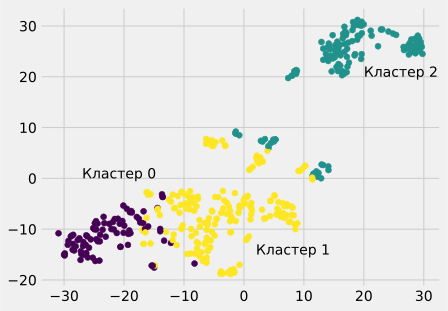

In [94]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=labels_train)
plt.text(-27, 0, 'Кластер 0')
plt.text(2, -15, 'Кластер 1')
plt.text(20, 20, 'Кластер 2')

### Вычислите средние значения price и CRIM в разных кластерах.

In [95]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534886

In [96]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [98]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.42166020942408367

### *Задание 3

### Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

In [99]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


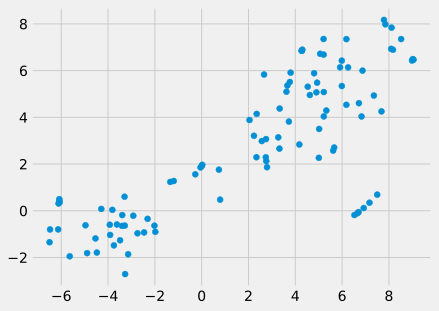

In [100]:
plt.scatter(X_test_tsne[:,0], X_test_tsne[:,1])

Text(20, 20, 'Кластер 2')

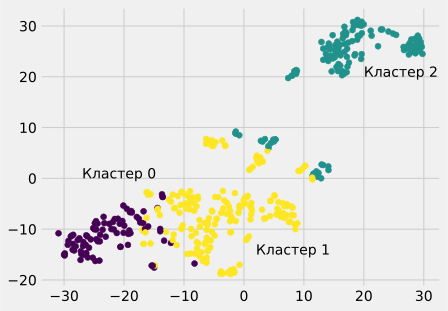

In [101]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=labels_train)
plt.text(-27, 0, 'Кластер 0')
plt.text(2, -15, 'Кластер 1')
plt.text(20, 20, 'Кластер 2')

### Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [103]:
X_test.loc[labels_test==0, 'CRIM'].mean()

0.062060000000000004

In [104]:
X_test.loc[labels_test==1, 'CRIM'].mean()

10.165531142857143

In [105]:
X_test.loc[labels_test==2, 'CRIM'].mean()

0.26607882352941176

In [107]:
y_test.loc[labels_test==0, 'price'].mean()

31.35

In [108]:
y_test.loc[labels_test==1, 'price'].mean()

16.437142857142856

In [109]:
y_test.loc[labels_test==2, 'price'].mean()

21.860784313725492